<a href="https://colab.research.google.com/github/lukuenya/pattern_recognition/blob/seraina/Team22-AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Imports.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [72]:
# Preprocessing.
# Insert the dataset into a Dataframe called movies_df
df = pd.read_csv("../../dataset.csv", header=None)

# Separate into X (features) and y (label)
X = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.5, random_state=77)

In [73]:
# Part A.1
# Train a Naive Bayes classifier with MLE and assuming the same covariance matrix for all classes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
ySame_pred = classifier.predict(X_test)

# Calculate error
mean_error_same_covariance  = 1 - accuracy_score(y_test, ySame_pred)

print(f"Error of same covariance: {mean_error_same_covariance :.2f}")

Error of same covariance: 0.15


In [74]:
# Part A.2
# Estimate mean and covariance matrix for each class
class_means = [X_train[y_train == c].mean() for c in np.unique(y_train)]
class_covariances = [X_train[y_train == c].cov() for c in np.unique(y_train)]

# Perform Maximum Likelihood Estimation for each class
class_distributions = [multivariate_normal(mean=mean, cov=cov) for mean, cov in zip(class_means, class_covariances)]

# Make predictions on the test set
yDiff_pred = np.argmax([np.log(d.pdf(X_test)) for d in class_distributions], axis=0)

# Calculate error
mean_error_diff_covariance  = 1 - accuracy_score(y_test, yDiff_pred)
print(f"Error of different covariance: {mean_error_diff_covariance:.2f}")

Error of different covariance: 0.98


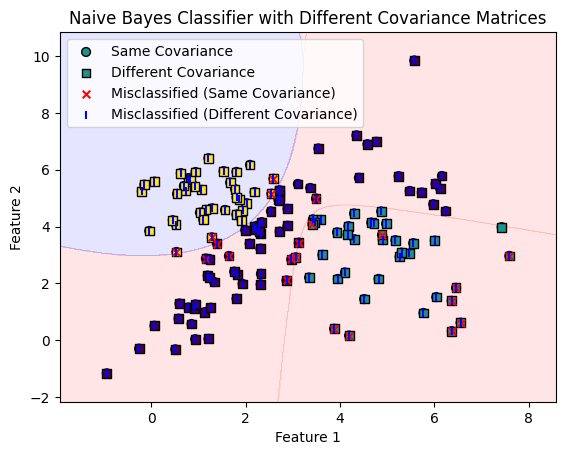

In [75]:
# Part A.3
# Plot the decision regions and misclassified points
h = .02  # step size in the mesh

x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, ax = plt.subplots()

# Plot decision regions
Z = np.argmax([d.logpdf(np.c_[xx.ravel(), yy.ravel()]) for d in class_distributions], axis=0)
Z = Z.reshape(xx.shape)

cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
ax.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

# Plot the test points
scatter_same = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=ySame_pred, cmap='viridis', edgecolor='k', s=40, label='Same Covariance')
scatter_diff = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=yDiff_pred, cmap='viridis', edgecolor='k', s=40, marker='s', label='Different Covariance')

# Mark misclassified points for both classifiers
misclassified_indices_same = y_test != ySame_pred
misclassified_indices_diff = y_test != yDiff_pred

ax.scatter(X_test.loc[misclassified_indices_same, 0], X_test.loc[misclassified_indices_same, 1],
           marker='x', color='red', s=30, label='Misclassified (Same Covariance)')

ax.scatter(X_test.loc[misclassified_indices_diff, 0], X_test.loc[misclassified_indices_diff, 1],
           marker='|', color='blue', s=30, label='Misclassified (Different Covariance)')

# Set plot labels and legend
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Naive Bayes Classifier with Different Covariance Matrices')
ax.legend()

# Show the plot
plt.show()

In [76]:
# Choose the model with the smallest mean error
if mean_error_same_covariance < mean_error_diff_covariance:
    print("Choosing Naive Bayes with the same covariance matrix.")
else:
    print("Choosing Naive Bayes with different covariance matrices.")

Choosing Naive Bayes with the same covariance matrix.
